INFOMHNA Lab Assignment 1

Christian Acosta - 6369251

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
(x_train.shape)

(60000, 28, 28)

Exercise one: Identifying handwritten numbers

Fully-connected neural networks

In [5]:
x_train_rs = x_train.reshape(60000, 784)

In [6]:
x_test_rs = x_test.reshape(10000, 784)

In [7]:
x_train_rs.shape
x_test_rs.shape

(10000, 784)

In [8]:
x_train_rs = x_train_rs/255

In [9]:
x_test_rs = x_test_rs/255

In [10]:
y_train_labels = keras.utils.to_categorical(y_train, 10)

In [11]:
y_test_labels = keras.utils.to_categorical(y_test, 10)

In [12]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

2023-03-05 22:09:16.422497: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 22:09:16.446446: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 22:09:16.446615: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 22:09:16.447412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [15]:
history = model.fit(x_train_rs, y_train_labels, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12


2023-03-05 22:09:31.855153: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f0756f52420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-05 22:09:31.855173: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
2023-03-05 22:09:31.869701: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-05 22:09:32.057024: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 [==============================] - 2s 3ms/step - loss: 0.4024 - accuracy: 0.8842 - val_loss: 0.3004 - val_accuracy: 0.9140
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.3109 - accuracy: 0.9120 - val_loss: 0.2916 - val_accuracy: 0.9218
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2977 - accuracy: 0.9148 - val_loss: 0.2847 - val_accuracy: 0.9212
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2879 - accuracy: 0.9193 - val_loss: 0.2744 - val_accuracy: 0.9249
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2829 - accuracy: 0.9208 - val_loss: 0.2800 - val_accuracy: 0.9221
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.9223 - val_loss: 0.2845 - val_accuracy: 0.9213
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.2761 - accuracy: 0.9229 - val_loss: 0.2758 - val_accuracy: 0.9248
Epoch 8/12
375/37

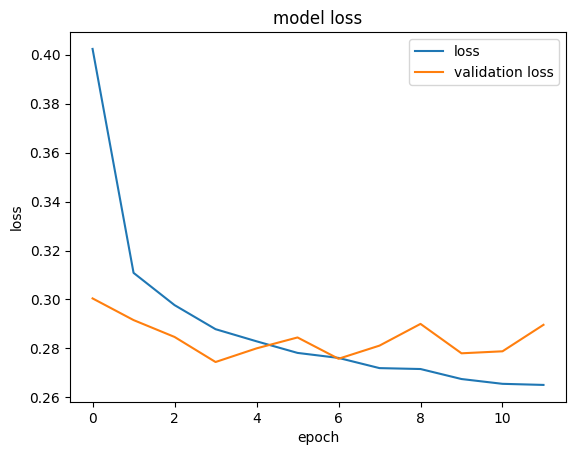

In [16]:
#Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

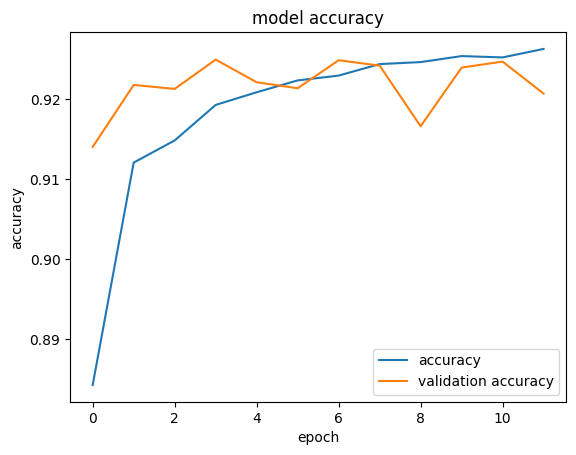

In [17]:
#Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [18]:
loss, accuracy = model.evaluate(x_test_rs, y_test_labels, verbose=0)

In [19]:
print(loss, accuracy)

0.2878040671348572 0.9222999811172485


Addition of RELU activation function

In [20]:
model_relu = keras.Sequential()
model_relu.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model_relu.add(keras.layers.Dense(10, activation='softmax'))

In [21]:
model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_relu.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [23]:
history_relu = model_relu.fit(x_train_rs, y_train_labels, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 2s 3ms/step - loss: 0.3244 - accuracy: 0.9091 - val_loss: 0.1704 - val_accuracy: 0.9540
Epoch 2/12
375/375 [==============================] - 1s 2ms/step - loss: 0.1464 - accuracy: 0.9580 - val_loss: 0.1265 - val_accuracy: 0.9629
Epoch 3/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0992 - accuracy: 0.9709 - val_loss: 0.1054 - val_accuracy: 0.9683
Epoch 4/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0743 - accuracy: 0.9785 - val_loss: 0.0897 - val_accuracy: 0.9738
Epoch 5/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9833 - val_loss: 0.0906 - val_accuracy: 0.9734
Epoch 6/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0461 - accuracy: 0.9867 - val_loss: 0.0861 - val_accuracy: 0.9748
Epoch 7/12
375/375 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9892 - val_loss: 0.0814 - val_accuracy: 0.9764
Epoch 

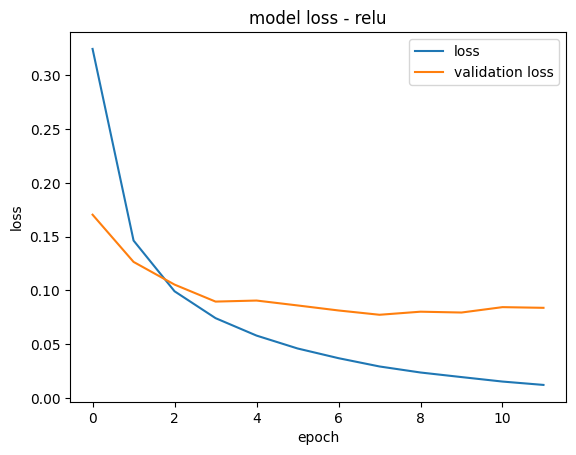

In [24]:
#Loss graph
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

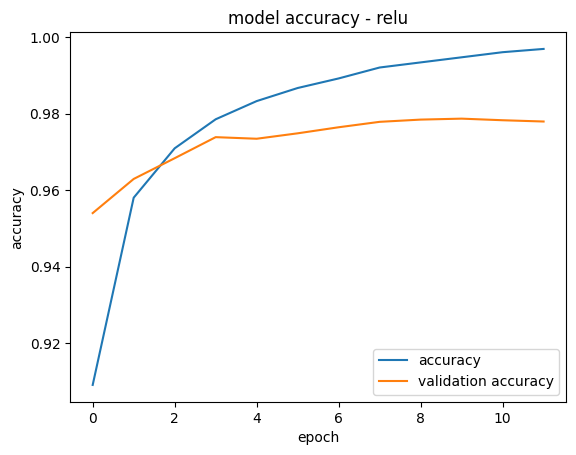

In [25]:
#Accuracy graph
plt.plot(history_relu.history['accuracy'])
plt.plot(history_relu.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [26]:
loss_relu, accuracy_relu = model_relu.evaluate(x_test_rs, y_test_labels, verbose=0)

In [27]:
print(loss_relu, accuracy_relu)

0.07280866801738739 0.978600025177002


Deep convolutional neural networks

In [28]:
x_train_deep = x_train.reshape(60000, 28, 28, 1)

In [29]:
x_test_deep = x_test.reshape(10000, 28, 28, 1)

In [30]:
x_train_deep = x_train_deep/255

In [31]:
x_test_deep = x_test_deep/255

In [32]:
model_dnn = keras.Sequential()
model_dnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28, 1)))
model_dnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn.add(keras.layers.Flatten())
model_dnn.add(keras.layers.Dense(128, activation="relu"))
model_dnn.add(keras.layers.Dense(10, activation="softmax"))
model_dnn.compile(loss='categorical_crossentropy')


In [33]:
model_dnn.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy')

In [34]:
history_dnn = model_dnn.fit(x_train_deep, y_train_labels, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6


2023-03-05 22:10:29.278906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


375/375 [==============================] - 7s 10ms/step - loss: 0.2283 - accuracy: 0.9302 - val_loss: 0.0645 - val_accuracy: 0.9814
Epoch 2/6
375/375 [==============================] - 4s 9ms/step - loss: 0.0554 - accuracy: 0.9831 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 3/6
375/375 [==============================] - 3s 9ms/step - loss: 0.0340 - accuracy: 0.9898 - val_loss: 0.0428 - val_accuracy: 0.9874
Epoch 4/6
375/375 [==============================] - 4s 9ms/step - loss: 0.0227 - accuracy: 0.9931 - val_loss: 0.0433 - val_accuracy: 0.9871
Epoch 5/6
375/375 [==============================] - 4s 9ms/step - loss: 0.0160 - accuracy: 0.9953 - val_loss: 0.0388 - val_accuracy: 0.9888
Epoch 6/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0430 - val_accuracy: 0.9883


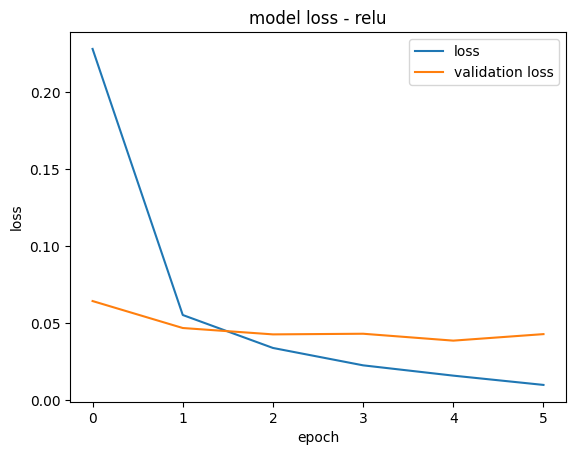

In [35]:
#Loss graph
plt.plot(history_dnn.history['loss'])
plt.plot(history_dnn.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

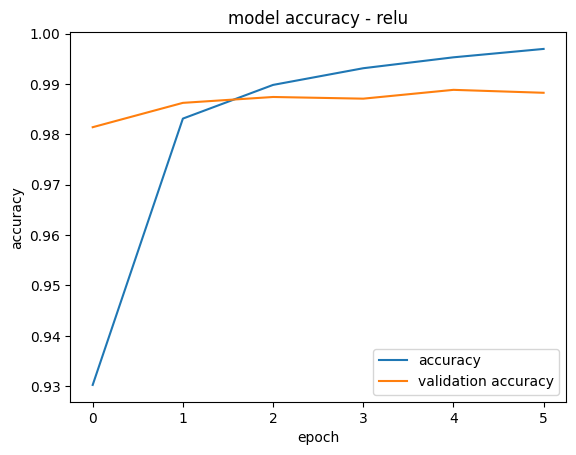

In [36]:
#Accuracy graph
plt.plot(history_dnn.history['accuracy'])
plt.plot(history_dnn.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [37]:
loss_dnn, accuracy_dnn = model_dnn.evaluate(x_test_deep, y_test_labels, verbose=0)

In [38]:
print(loss_dnn, accuracy_dnn)

0.03880566358566284 0.9878000020980835


Dropout layers

In [39]:
model_dnn_dropout = keras.Sequential()
model_dnn_dropout.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28, 1)))
model_dnn_dropout.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn_dropout.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn_dropout.add(keras.layers.Dropout(rate=0.25))
model_dnn_dropout.add(keras.layers.Flatten())
model_dnn_dropout.add(keras.layers.Dense(128, activation="relu"))
model_dnn_dropout.add(keras.layers.Dense(10, activation="softmax"))
model_dnn_dropout.add(keras.layers.Dropout(rate=0.50))
model_dnn_dropout.compile(loss='categorical_crossentropy')


In [40]:
model_dnn_dropout.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy')

In [41]:
history_dnn_dropout = model_dnn.fit(x_train_deep, y_train_labels, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0072 - accuracy: 0.9978 - val_loss: 0.0421 - val_accuracy: 0.9894
Epoch 2/6
375/375 [==============================] - 4s 9ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0518 - val_accuracy: 0.9889
Epoch 3/6
375/375 [==============================] - 4s 9ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.0473 - val_accuracy: 0.9892
Epoch 4/6
375/375 [==============================] - 4s 10ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0516 - val_accuracy: 0.9889
Epoch 5/6
375/375 [==============================] - 4s 10ms/step - loss: 8.6016e-04 - accuracy: 0.9998 - val_loss: 0.0524 - val_accuracy: 0.9898
Epoch 6/6
375/375 [==============================] - 4s 10ms/step - loss: 8.2008e-04 - accuracy: 0.9997 - val_loss: 0.0542 - val_accuracy: 0.9898


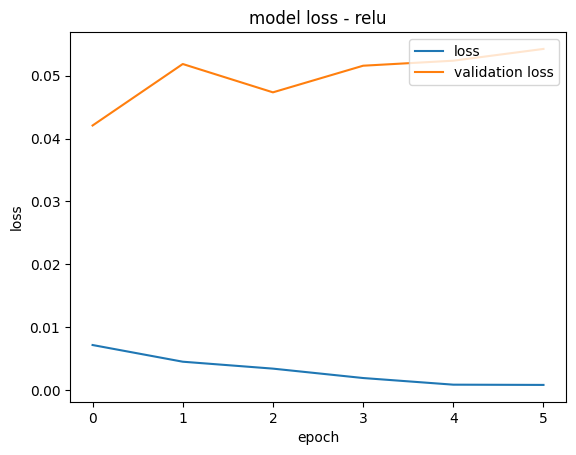

In [42]:
#Loss graph
plt.plot(history_dnn_dropout.history['loss'])
plt.plot(history_dnn_dropout.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

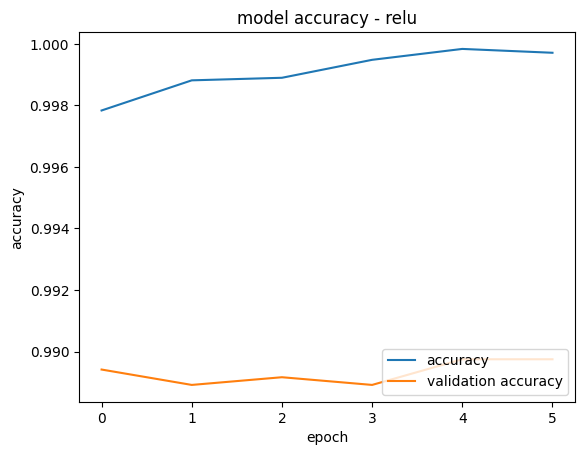

In [43]:
#Accuracy graph
plt.plot(history_dnn_dropout.history['accuracy'])
plt.plot(history_dnn_dropout.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [44]:
loss_dnn_dropout, accuracy_dnn_dropout = model_dnn_dropout.evaluate(x_test_deep, y_test_labels, verbose=0)

In [45]:
#Check results --> don't seem to make sense
#generalizability seems to be very bad compared to no dropout model 
print(loss_dnn_dropout, accuracy_dnn_dropout)

2.3022172451019287 0.11479999870061874


Exercise two: Identifying objects from images

In [46]:
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = keras.datasets.cifar10.load_data()

In [47]:
x_train_cifar = x_train_cifar/255

In [48]:
x_test_cifar = x_test_cifar/255

In [49]:
y_train_cifar_labels = keras.utils.to_categorical(y_train_cifar, 10)

In [50]:
y_test_cifar_labels = keras.utils.to_categorical(y_test_cifar, 10)

In [58]:
model_dnn_cifar = keras.Sequential()
model_dnn_cifar.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape = (32, 32, 3), padding = 'same'))
model_dnn_cifar.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn_cifar.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn_cifar.add(keras.layers.Dropout(rate=0.25))
model_dnn_cifar.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu"))
model_dnn_cifar.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn_cifar.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn_cifar.add(keras.layers.Dropout(rate=0.25))
model_dnn_cifar.add(keras.layers.Flatten())
model_dnn_cifar.add(keras.layers.Dense(512, activation="relu"))
model_dnn_cifar.add(keras.layers.Dense(10, activation="softmax"))
model_dnn_cifar.compile(loss='categorical_crossentropy')


In [59]:
model_dnn_cifar.compile(loss='categorical_crossentropy', 
optimizer = keras.optimizers.RMSprop(learning_rate=0.0001,
weight_decay=1e-6), 
metrics='accuracy')

In [61]:
history_dnn_cifar = model_dnn_cifar.fit(x_train_cifar, y_train_cifar_labels, batch_size=32, 
epochs=20, verbose=1, validation_data=(x_test_cifar, y_test_cifar_labels), shuffle = True)

Epoch 1/20
  15/1563 [..............................] - ETA: 11s - loss: 1.6459 - accuracy: 0.4167

2023-03-05 22:24:08.889722: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_7/dropout_8/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 12s 8ms/step - loss: 1.5558 - accuracy: 0.4344 - val_loss: 1.4059 - val_accuracy: 0.4918
Epoch 2/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3854 - accuracy: 0.5000 - val_loss: 1.2840 - val_accuracy: 0.5422
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2793 - accuracy: 0.5468 - val_loss: 1.1997 - val_accuracy: 0.5766
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1966 - accuracy: 0.5795 - val_loss: 1.2560 - val_accuracy: 0.5663
Epoch 5/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1282 - accuracy: 0.6025 - val_loss: 1.1206 - val_accuracy: 0.6085
Epoch 6/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0728 - accuracy: 0.6239 - val_loss: 1.0418 - val_accuracy: 0.6388
Epoch 7/20
1563/1563 [==============================] - 12s 7ms/step - loss: 1.0216 - accuracy: 0.6431 - val_loss: 1.0302 - val_accuracy: 0.6

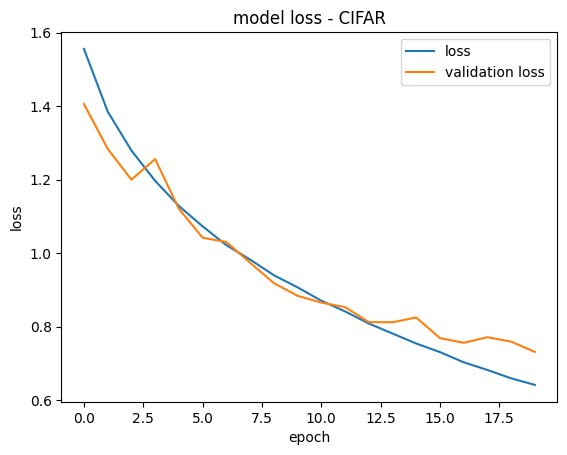

In [62]:
#Loss graph
plt.plot(history_dnn_cifar.history['loss'])
plt.plot(history_dnn_cifar.history['val_loss'])
plt.title('model loss - CIFAR')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

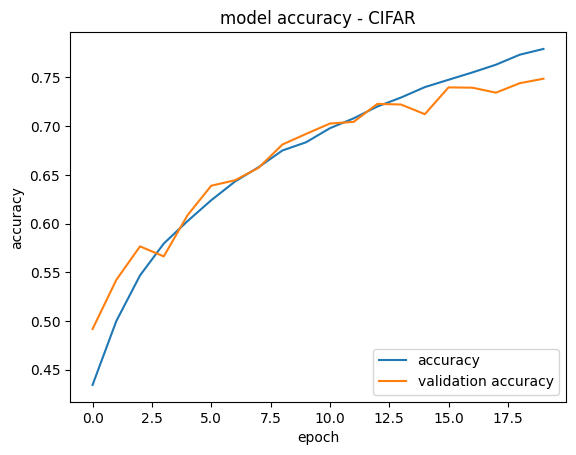

In [63]:
#Accuracy graph
plt.plot(history_dnn_cifar.history['accuracy'])
plt.plot(history_dnn_cifar.history['val_accuracy'])
plt.title('model accuracy - CIFAR')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

Exercise three: Low-level functions

Write a simple function that achieves the convolution operation efficiently for two-
dimensional and three-dimensional inputs. This should allow you to input a set of
convolutional filters (‘kernels’ in Keras’s terminology) and an input layer (or image)
as inputs. The input layer should have a third dimension, representing a stack of
feature maps, and each filter should have a third dimension of corresponding size.
The function should output a number of two-dimensional feature maps
corresponding to the number of input filters, though these can be stacked into a third
dimensional like the input layer.
In your answer, please give the code you have written (yourselves). Also include an
example input image (for example from the mnist set) and the same image
convolved with two 3x3 filters, one detecting horizontal edges and the other
detecting vertical edges

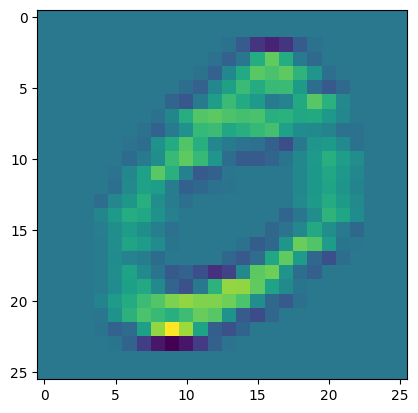

In [65]:
#picking the second image of the set as an example
img1=x_train[1] 
#two selfmade filters for recognition horizontal and vertical lines
testhorz_array=np.array([[-2,-2,-2],[5,5,5],[-2,-2,-2]])
testvert_array=np.array([[-2,5,-2],[-2,5,-2],[-2,5,-2]])

#function to apply a filter on an image 
def apply_map(img, map):
    return np.sum(np.multiply(img, map))
def apply_filter(img1, array1):
  output=np.zeros((26,26))
  for i in range( len(img1)-2):
    for j in range(len(img1)-2):
      check=img1[i:i+3,j:j+3]
      value=apply_map(check,array1)
      output[i,j]=value
  return(output)
#to test the function
future_map=apply_filter(img1,testhorz_array)
# Display the feature map using Matplotlib
plt.imshow(future_map, cmap='viridis')
plt.show()

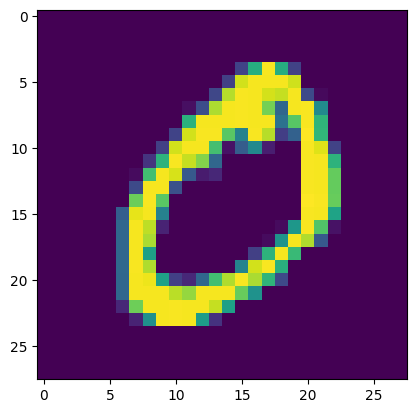

In [66]:
plt.imshow(img1)
plt.show()

Write a simple function that achieves rectified linear (relu) activation over a whole
feature map, with a threshold at zero. In your answer, give the code you have written
and one of the previous convolved images after this operation. 

In [67]:
def relu(feature_map):
    return np.maximum(0, feature_map)


featuture_map2=relu(future_map)

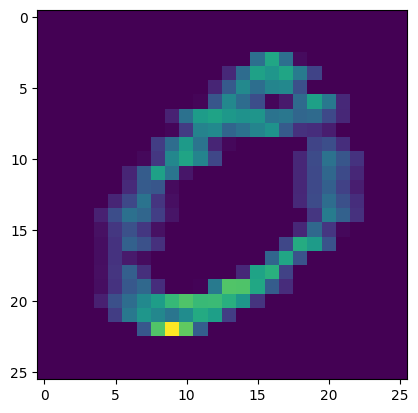

In [68]:
# Display the future map using Matplotlib
plt.imshow(featuture_map2, cmap='viridis')
plt.show()

Write a simple function that achieves max pooling. This should allow you to specify
the spatial extent of the pooling, with the size of the output feature map changing
accordingly. In your answer, give the code you have written and the image from the
previous question after pooling with a 2x2 kernel. 

In [69]:
def max_pooling_2d(input_array):
    # Define the window size and stride
    window_size = (2, 2)
    stride = 2
    
    # Compute the output shape
    out_shape = ((input_array.shape[0] - window_size[0]) // stride + 1,
                 (input_array.shape[1] - window_size[1]) // stride + 1)
    
    # Create an empty output array
    output = np.zeros(out_shape)
    
    # Apply max pooling to each window
    for i in range(out_shape[0]):
        for j in range(out_shape[1]):
            window = input_array[i*stride:i*stride+window_size[0],
                                 j*stride:j*stride+window_size[1]]
            output[i, j] = np.amax(window)
    
    return output

In [70]:
max_feature_map=max_pooling_2d(featuture_map2)
max_feature_map.shape
#plt.imshow(max_feutrue_map, cmap='viridis')
#plt.show()

(13, 13)

Write a simple function that achieves normalisation within each feature map,
modifying the feature map so that its mean value is zero and its standard deviation is
one. In your answer, give the code you have written. 

In [71]:
def normalize_feature_map(feature_map):
    # Compute the mean and standard deviation the feature map
    mean = np.mean(feature_map)
    std = np.std(feature_map)
    
    # Subtract the mean and divide by the standard deviation the feature map
    normalized_feature_map = (feature_map - mean) / (std )
    
    return normalized_feature_map

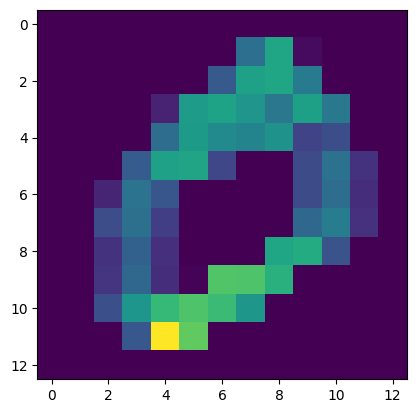

In [72]:
new_map=normalize_feature_map(max_feature_map)
plt.imshow(new_map, cmap='viridis')
plt.show()

Write a function that produces a fully-connected layer. This should allow you to
specify the number of output nodes, and link each of these to every node in an input
stack of feature maps. You should probably begin by flattening this stack of feature
maps into a 1-dimensional matrix. In your answer, give the code you have written.

In [ ]:
def fully_connected_layer(input_feature_maps, num_output_nodes):
    # Flatten the input feature maps into a 1D array
    #flattened_input = input_feature_maps.flatten()

    amount=input_feature_maps.shape[0]*input_feature_maps.shape[1]*input_feature_maps[2]
    flattened_input= np.reshape(input_feature_maps,(amount,1))
    
    # Compute the input size of the fully-connected layer
    input_size = flattened_input.shape[0]
    
    # Initialize the weight matrix and bias vector
    W = np.random.randn(num_output_nodes, input_size)
    b = np.random.randn(num_output_nodes)
    
    # Compute the output of the fully-connected layer
    output = np.dot(W, flattened_input) + b
    
    return output


Write a function that converts the activation of a 1-dimensional matrix (such as the
output of a fully-connected layer) into a set of probabilities that each matrix element
11
is the most likely classification. This should include the algorithmic expression of a
softmax (normalised exponential) function. In your answer, give the code you have
written. 

In [ ]:
def softmax(x):
    # Subtract the maximum value for numerical stability
    x = x - np.max(x)
    
    # Compute the exponential of each element
    exp_x = np.exp(x)
    
    # Normalize the exponential values to sum to 1
    probs = exp_x / np.sum(exp_x)
    
    return probs